In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [118]:
# Params
path_data_train = 'data/x_train.csv'
path_data_test = 'data/x_test.csv'
n_features = 5
n_past = 48
n_future = 12

In [96]:
def data_import(path_data, n_features = 5):
    raw_data = pd.read_csv(path_data, sep=";", date_parser="date")
    raw_data.date = pd.to_datetime(raw_data.date)
    raw_data.index = raw_data.date
    raw_data = raw_data.drop(columns=['date'], axis=0)
    print(raw_data.isnull().sum())
    #Entfernen der Precipitation, Barmen Wuppertal Verband
    raw_data=raw_data.iloc[:,0:n_features]
    return raw_data

In [97]:
raw_data = data_import(path_data=path_data_train)
raw_data

Discharge,  Stausee Beyenburg                           0
Water Level,  Stausee Beyenburg                         0
Water Level,  Kluserbrücke                              0
Precipitation,  Beyenburg                               0
Water Level,  Leimbach                                  0
Precipitation,  Barmen Wupperverband Hauptverwaltung    0
dtype: int64


,"Discharge, Stausee Beyenburg","Water Level, Stausee Beyenburg","Water Level, Kluserbrücke","Precipitation, Beyenburg","Water Level, Leimbach"
date,,,,,
2020-03-28 08:00:00,1.950000,23.500000,18.750000,0.0,7.680000
2020-03-28 08:30:00,1.950000,23.416667,18.723077,0.0,7.180000
2020-03-28 09:00:00,1.950000,23.683333,18.740000,0.0,6.666667
2020-03-28 09:30:00,1.950000,23.840000,18.692857,0.0,6.783333
2020-03-28 10:00:00,1.963333,23.980000,18.720000,0.0,6.700000
...,...,...,...,...,...
2022-02-16 22:00:00,18.708333,92.380000,86.866667,28.0,15.250000
2022-02-16 22:30:00,18.941667,92.766667,86.750000,28.0,15.100000
2022-02-16 23:00:00,18.883333,92.616667,87.083333,10.0,14.966667


In [109]:
raw_test_data = data_import(path_data=path_data_test)
raw_test_data

Discharge,  Stausee Beyenburg                           0
Water Level,  Stausee Beyenburg                         0
Water Level,  Kluserbrücke                              0
Precipitation,  Beyenburg                               0
Water Level,  Leimbach                                  0
Precipitation,  Barmen Wupperverband Hauptverwaltung    0
dtype: int64


,"Discharge, Stausee Beyenburg","Water Level, Stausee Beyenburg","Water Level, Kluserbrücke","Precipitation, Beyenburg","Water Level, Leimbach"
date,,,,,
2022-02-17 00:30:00,18.623333,92.466667,86.516667,10.0,14.766667
2022-02-17 01:00:00,18.900000,92.666667,88.133333,10.0,15.450000
2022-02-17 01:30:00,18.883333,92.983333,91.500000,10.0,16.966667
2022-02-17 02:00:00,19.008333,93.450000,96.033333,10.0,16.700000
2022-02-17 02:30:00,19.170000,94.016667,101.100000,10.0,18.600000
...,...,...,...,...,...
2022-06-12 22:00:00,1.628333,16.883333,20.050000,0.0,6.783333
2022-06-12 22:30:00,1.636000,17.000000,19.933333,0.0,6.866667
2022-06-12 23:00:00,1.656667,17.316667,19.933333,0.0,6.750000


In [ ]:
scaler = StandardScaler()
scaler_fitted = scaler.fit(raw_data)
scaled_train_data = scaler_fitted.transform(raw_data)
scaled_train_data

In [106]:

scaled_test_data = scaler_fitted.transform(raw_test_data)
scaled_test_data

Discharge,  Stausee Beyenburg                           0
Water Level,  Stausee Beyenburg                         0
Water Level,  Kluserbrücke                              0
Precipitation,  Beyenburg                               0
Water Level,  Leimbach                                  0
Precipitation,  Barmen Wupperverband Hauptverwaltung    0
dtype: int64


array([[ 1.6362137 ,  2.50420343,  2.88853512,  1.14127286,  3.04525777],
       [ 1.66881544,  2.51288825,  2.9685451 ,  1.14127286,  3.34311088],
       [ 1.66685148,  2.52663922,  3.13516382,  1.14127286,  4.00419949],
       ...,
       [-0.36309783, -0.75911813, -0.40672122, -0.45755661, -0.44906777],
       [-0.36388342, -0.76309867, -0.40507153, -0.45755661, -0.42727364],
       [-0.36152667, -0.7504333 , -0.40177215, -0.45755661, -0.44180306]])

In [108]:
split = int(len(scaled_train_data)*0.8)
train_data = scaled_train_data[:split]
val_data = scaled_train_data[split:]
len(train_data)

26522

In [52]:
# This function creates two day-wise periodic features (sin and cos) and adds those as columns to the dataframe.
# It also shows a little plot as demonstration.
# Expand the function to also accord for two year-wise periodic features

def periodizer(data: pd.DataFrame, date_format: str = 'day'):
    """
    Function to create a daily or yearly periodic feature out of a given dataset with a readable timestamp.
    date_format takes in a string (either 'day' or 'year') to define what feature has to be created.
    Output is an exemplary presentation of the periodic feature,
    with x-axis = time [h] and y-axis shows a sine or cosine signal.
    """

    per_dataset = data

    if date_format == 'day':
        per_data = per_dataset.index.hour
        # Day has 24 hours
        day = 24
        per_dataset['Day_sin'] = 0.5 *np.sin(per_data * 2 * np.pi/day) +0.5
        per_dataset['Day_cos'] = 0.5 *np.cos(per_data * 2 * np.pi/day) +0.5

        # Show a small example of how the signal looks
        plt.plot(np.array(per_dataset['Day_sin'])[0:200])
        plt.plot(np.array(per_dataset['Day_cos'])[0:200])

        plt.show()
        # return(per_dataset)

    elif date_format == 'year':
        per_data = per_dataset.index.day_of_year

        # Year has 365 days
        year = 365

        per_dataset['Year_sin'] = 0.5 *np.sin(per_data * 2 * np.pi/year)+0.5
        per_dataset['Year_cos'] = 0.5 *np.cos(per_data * 2 * np.pi/year)+0.5
        # Show a small example of how the signal looks
        plt.plot(np.array(per_dataset['Year_sin'])[0:20000])
        plt.plot(np.array(per_dataset['Year_cos'])[0:20000])

        plt.show()

    else:
        print("Incorrect date_format given in. Has to be either 'day' or 'year'.")
    return()

In [53]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

(26463, 48, 5)

In [116]:
train_x, train_y = split_series(train_data,n_past=n_past, n_future= n_future)
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1],n_features))
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], n_features))

val_x, val_y = split_series(val_data,n_past=n_past, n_future= n_future)
val_x = val_x.reshape((val_x.shape[0], val_x.shape[1],n_features))
val_y = val_y.reshape((val_y.shape[0], val_y.shape[1], n_features))

test_x, test_y = split_series(scaled_test_data, n_past=n_past, n_future= n_future)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1],n_features))
test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], n_features))


In [139]:
#Encoder
encoder_input = tf.keras.layers.Input(shape=(n_past,n_features))
encoder_layer_1 = tf.keras.layers.LSTM(50, return_state= True)
encoder_output = encoder_layer_1(encoder_input)
initial_states = encoder_output[1:]

#Decoder
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_output[0])
print(decoder_inputs)
decoder_layer_1 = tf.keras.layers.LSTM(50, return_sequences= True)(decoder_inputs, initial_state=initial_states)
decoder_output = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))(decoder_layer_1)

model_encoder1_decoder1 = tf.keras.models.Model(encoder_input, decoder_output)
model_encoder1_decoder1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())


KerasTensor(type_spec=TensorSpec(shape=(None, 12, 50), dtype=tf.float32, name=None), name='repeat_vector_5/Tile:0', description="created by layer 'repeat_vector_5'")


In [ ]:
history_e1d1=model_encoder1_decoder1.fit(train_x, train_y, epochs=20, validation_data=(val_x,val_y), batch_size=32, verbose=1)
# summarize history for loss
plt.plot(history_e1d1.history['loss'])
plt.plot(history_e1d1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [170]:
#Encoder
encoder_input_1 = tf.keras.layers.Input(shape=(n_past,n_features))
encoder_layer_1 = tf.keras.layers.LSTM(50, return_state= True, return_sequences= True)
encoder_output_1 = encoder_layer_1(encoder_input_1)
initial_states_1 = encoder_output_1[1:]

encoder_layer_2 = tf.keras.layers.LSTM(50, return_state= True)
encoder_output_2 = encoder_layer_2(encoder_output_1[0])
initial_states_2 = encoder_output_2[1:]

#Decoder
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_output_2[0])
decoder_layer_1 = tf.keras.layers.LSTM(50, return_sequences= True)(decoder_inputs, initial_state=initial_states_1)
decoder_layer_2 = tf.keras.layers.LSTM(50, return_sequences= True)(decoder_layer_1, initial_state=initial_states_2)
decoder_output = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))(decoder_layer_2)

#Model
model_encoder2_decoder2 = tf.keras.models.Model(encoder_input_1, decoder_output)
model_encoder2_decoder2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError())


Epoch 1/20
827/827 [==============================] - 130s 142ms/step - loss: 0.3858 - val_loss: 0.5161
Epoch 2/20
827/827 [==============================] - 68s 82ms/step - loss: 0.3601 - val_loss: 0.4971
Epoch 3/20
827/827 [==============================] - 69s 83ms/step - loss: 0.3562 - val_loss: 0.4717
Epoch 4/20
827/827 [==============================] - 69s 84ms/step - loss: 0.3524 - val_loss: 0.4624
Epoch 5/20
827/827 [==============================] - 70s 85ms/step - loss: 0.3482 - val_loss: 0.4781
Epoch 6/20
827/827 [==============================] - 69s 84ms/step - loss: 0.3467 - val_loss: 0.4987
Epoch 7/20
827/827 [==============================] - 69s 84ms/step - loss: 0.3437 - val_loss: 0.5146
Epoch 8/20
827/827 [==============================] - 71s 86ms/step - loss: 0.3478 - val_loss: 0.5090
Epoch 9/20
827/827 [==============================] - 69s 84ms/step - loss: 0.3427 - val_loss: 0.5594
Epoch 10/20
827/827 [==============================] - 69s 84ms/step - loss: 0.3

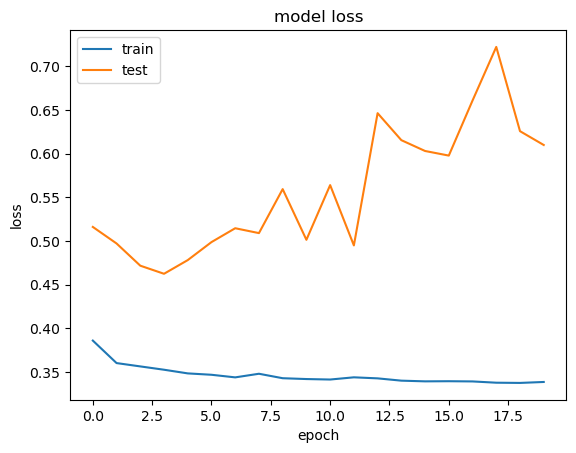

In [171]:
history_e2d2=model_encoder2_decoder2.fit(train_x, train_y, epochs=20, validation_data=(val_x,val_y), batch_size=32, verbose=1)
# summarize history for loss
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [207]:
prediction = model_encoder2_decoder2.predict(x = val_x)

206/206 [==============================] - 7s 33ms/step


In [210]:
prediction.shape

(6572, 12, 1)

In [211]:
val_y.shape

(6572, 12, 5)

array([-0.28540357, -0.27904034, -0.27000612, -0.2660782 , -0.26489982,
       -0.2658818 , -0.26686378, -0.26342685, -0.26509622, -0.26922053,
       -0.26466415, -0.26843495])

In [200]:
a = np.concatenate([prediction[0],prediction[0],prediction[0],prediction[0],prediction[0]], axis = 1)
a.shape

(12, 5)

In [219]:
train_data.shape

(26522, 5)

In [221]:
val_y[:,3].shape

(6572, 5)

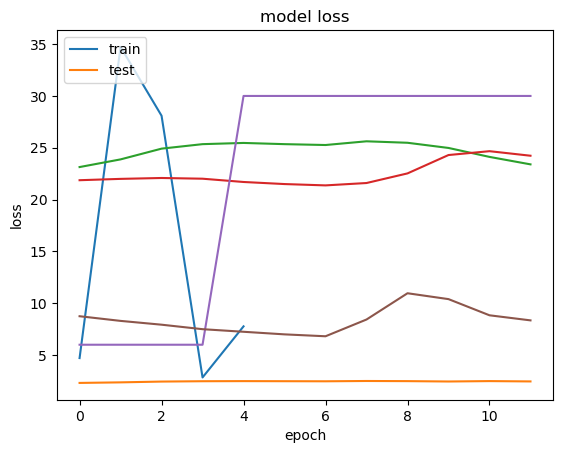

In [215]:

plt.plot(scaler_fitted.inverse_transform(a)[0])
plt.plot(scaler_fitted.inverse_transform(val_y[0]))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [173]:
prediction[0]

array([[2.6085114],
       [2.4644089],
       [2.3511624],
       [2.2632394],
       [2.2022648],
       [2.1689515],
       [2.1570697],
       [2.1593451],
       [2.1695805],
       [2.1831508],
       [2.1969829],
       [2.2092004]], dtype=float32)

Epoch 1/20
827/827 [==============================] - 36s 35ms/step - loss: 0.1088 - val_loss: 0.1710
Epoch 2/20
827/827 [==============================] - 28s 34ms/step - loss: 0.1052 - val_loss: 0.1760
Epoch 3/20
827/827 [==============================] - 28s 34ms/step - loss: 0.1046 - val_loss: 0.1716
Epoch 4/20
827/827 [==============================] - 28s 34ms/step - loss: 0.1041 - val_loss: 0.1741
Epoch 5/20
827/827 [==============================] - 28s 34ms/step - loss: 0.1041 - val_loss: 0.1763
Epoch 6/20
827/827 [==============================] - 29s 35ms/step - loss: 0.1038 - val_loss: 0.1798
Epoch 7/20
827/827 [==============================] - 29s 35ms/step - loss: 0.1035 - val_loss: 0.1768
Epoch 8/20
827/827 [==============================] - 29s 35ms/step - loss: 0.1034 - val_loss: 0.1798
Epoch 9/20
827/827 [==============================] - 30s 36ms/step - loss: 0.1032 - val_loss: 0.1788
Epoch 10/20
827/827 [==============================] - 29s 35ms/step - loss: 0.103

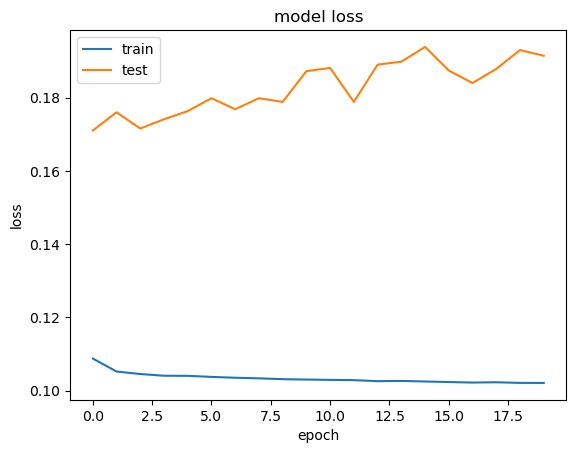